In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [52]:
data = pd.read_csv(r'Baku-house-data.csv')

data

,Location,sq.m,number_of_rooms,floor,price (AZN)
0,Shah Ismail Khatai m,108.0,2,3.0,210 000
1,8-ci mikrorayon,65.0,2,7.0,134 000
2,Yeni Gunesli,98.2,3,13.0,122 800
3,Nasimi r,248.0,5,15.0,1 000 000
4,Baku White City,126.1,3,NaN,453 960
...,...,...,...,...,...
3195,Narimanov r,86.0,2,7.0,118 000
3196,Nariman Narimanov m,85.0,3,9.0,200 000
3197,Qara Qarayev m,123.0,3,9.0,195 000
3198,Qara Qarayev m,70.0,2,8.0,124 000


In [53]:
data.describe(include='all')

,Location,sq.m,number_of_rooms,floor,price (AZN)
count,2986,3200.000000,3200.000000,2783.000000,3200
unique,76,NaN,NaN,NaN,631
top,Nasimi r,NaN,NaN,NaN,135 000
freq,210,NaN,NaN,NaN,44
mean,NaN,115.537625,2.852813,8.246497,NaN
std,NaN,73.159192,0.988473,5.053591,NaN
min,NaN,7.000000,1.000000,1.000000,NaN
25%,NaN,70.000000,2.000000,4.000000,NaN
50%,NaN,100.000000,3.000000,7.000000,NaN
75%,NaN,140.000000,3.000000,12.000000,NaN


In [54]:
data.dtypes

Location            object
sq.m               float64
number_of_rooms      int64
floor              float64
price (AZN)         object
dtype: object

In [55]:
data['price (AZN)'] = data['price (AZN)'].str.replace(' ', '')

In [56]:
data['price (AZN)'] = data['price (AZN)'].astype(int)

In [57]:
data.dtypes

Location            object
sq.m               float64
number_of_rooms      int64
floor              float64
price (AZN)          int64
dtype: object

In [74]:
data.describe(include='all')

,Location,sq.m,number_of_rooms,floor,price (AZN)
count,2503,2503.000000,2503.000000,2503.000000,2.503000e+03
unique,76,NaN,NaN,NaN,NaN
top,Nasimi r,NaN,NaN,NaN,NaN
freq,220,NaN,NaN,NaN,NaN
mean,NaN,110.829005,2.823012,8.280331,2.420374e+05
std,NaN,65.536282,0.927119,4.904166,2.400042e+05
min,NaN,7.000000,1.000000,1.000000,1.800000e+04
25%,NaN,70.000000,2.000000,4.000000,1.350000e+05
50%,NaN,99.700000,3.000000,8.000000,1.950000e+05
75%,NaN,137.000000,3.000000,12.000000,2.900000e+05


In [75]:
data

,Location,sq.m,number_of_rooms,floor,price (AZN)
0,Shah Ismail Khatai m,108.0,2,3.000000,210000
1,8-ci mikrorayon,65.0,2,7.000000,134000
2,Yeni Gunesli,98.2,3,13.000000,122800
3,Nasimi r,248.0,5,15.000000,1000000
4,Baku White City,126.1,3,8.280331,453960
...,...,...,...,...,...
3195,Narimanov r,86.0,2,7.000000,118000
3196,Nariman Narimanov m,85.0,3,9.000000,200000
3197,Qara Qarayev m,123.0,3,9.000000,195000
3198,Qara Qarayev m,70.0,2,8.000000,124000


In [76]:
data['price (AZN)'].max()

8075000

In [58]:
data.duplicated().sum()

697

In [59]:
data['Location'].duplicated().sum()

3123

In [60]:
duplicates = data[data.duplicated()]

duplicates

,Location,sq.m,number_of_rooms,floor,price (AZN)
40,Memar Ajami m,74.0,2,8.0,175000
41,Bilajary,90.0,4,3.0,137000
42,Memar Ajami m,93.0,2,9.0,165000
43,Memar Ajami m,55.0,2,4.0,103000
44,Yasamal r,85.0,2,22.0,92000
...,...,...,...,...,...
3173,Baku White City,103.5,3,NaN,357075
3174,NaN,100.0,2,NaN,273700
3175,NaN,166.3,4,NaN,465724
3176,Masazir,55.0,2,3.0,67000


In [61]:
a = duplicates[duplicates['Location']=='Memar Ajami m']

In [62]:
b = a[a['sq.m']==120]
b

,Location,sq.m,number_of_rooms,floor,price (AZN)
674,Memar Ajami m,120.0,3,15.0,216000
1185,Memar Ajami m,120.0,3,15.0,216000


In [63]:
data = data.drop_duplicates()

In [64]:
data.duplicated().sum()

0

In [65]:
data.shape

(2503, 5)

In [66]:
data.isnull().sum()

Location           43
sq.m                0
number_of_rooms     0
floor              88
price (AZN)         0
dtype: int64

In [67]:
for i in data.columns:
    if data[i].dtypes==object:
        data[i].fillna(value=data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(value=data[i].max(), inplace=True)

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/1994780711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i].fillna(value=data[i].mode()[0], inplace=True)
/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/1994780711.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i].fillna(value=data[i].mean(), inplace=True)


In [68]:
data.isnull().sum()

Location           0
sq.m               0
number_of_rooms    0
floor              0
price (AZN)        0
dtype: int64

In [69]:
data.dtypes

Location            object
sq.m               float64
number_of_rooms      int64
floor              float64
price (AZN)          int64
dtype: object

In [101]:
data.corr()['price (AZN)']

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/81697163.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['price (AZN)']


sq.m               0.850902
number_of_rooms    0.667834
floor              0.201072
price (AZN)        1.000000
Name: price (AZN), dtype: float64

In [71]:
for i in data.iloc[:,1:].columns:
    print(i)

sq.m
number_of_rooms
floor
price (AZN)


In [72]:
for i in data.columns:
    if data[i].dtypes==int or data[i].dtypes==float:
        print(i)

sq.m
number_of_rooms
floor
price (AZN)


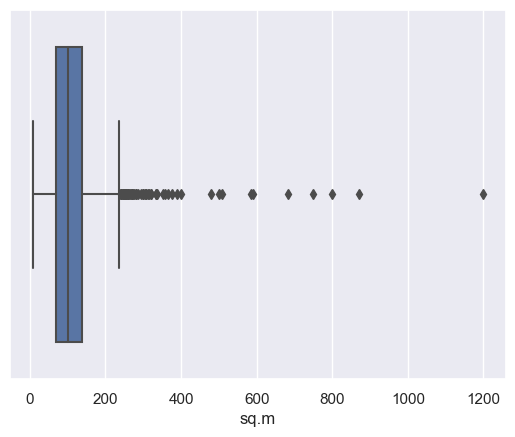

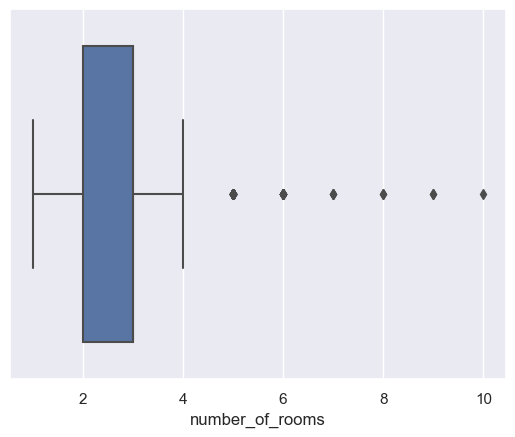

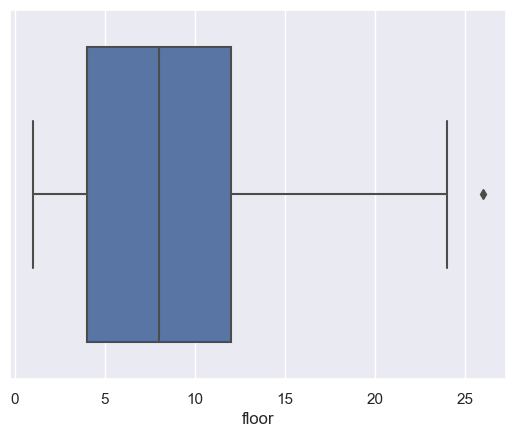

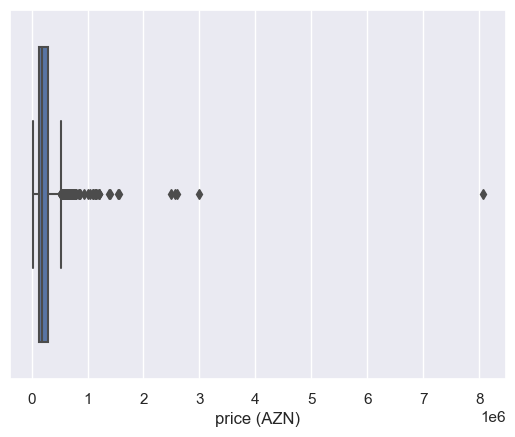

In [73]:
for i in data.columns:
    if data[i].dtypes==int or data[i].dtypes==float:
        sns.boxplot(x=data[i], data=data)
        plt.show()

In [82]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/520315184.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/520315184.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [83]:
Upper

sq.m                  237.5
number_of_rooms         4.5
floor                  24.0
price (AZN)        522500.0
dtype: float64

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/2735456236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])


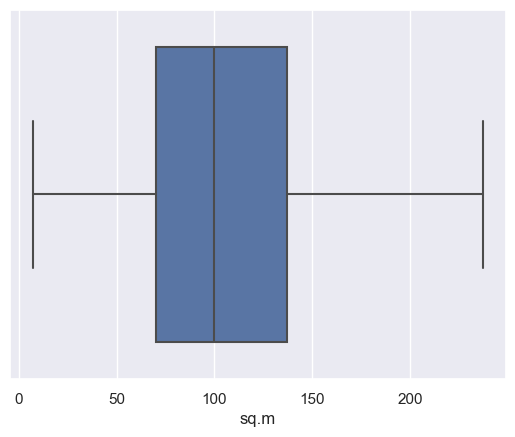

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/2735456236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])


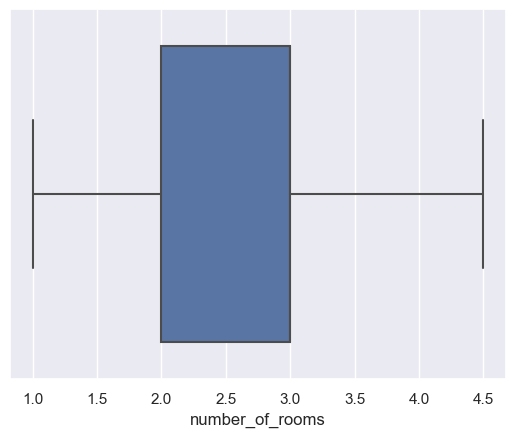

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/2735456236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])


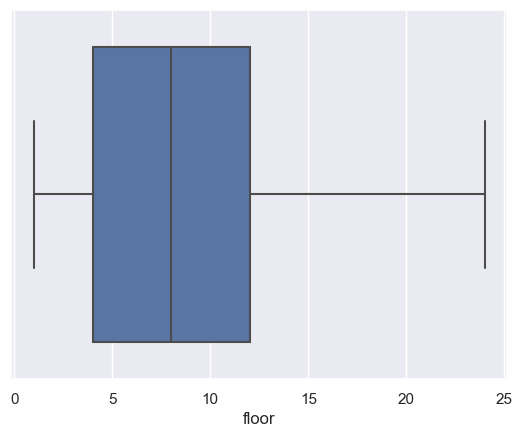

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_86181/2735456236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])


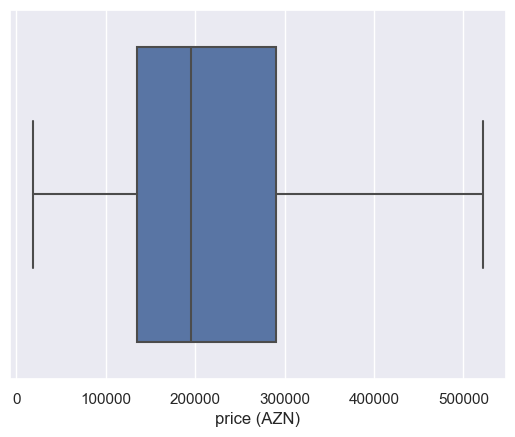

In [85]:
for i in data.columns:
    if data[i].dtypes==int or data[i].dtypes==float:
        data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
        sns.boxplot(x=data[i], data=data)
        plt.show()

In [86]:
data['price (AZN)'].max()

522500.0

In [87]:
data.columns

Index(['Location', 'sq.m', 'number_of_rooms', 'floor', 'price (AZN)'], dtype='object')

In [88]:
inputs = data[['sq.m', 'number_of_rooms', 'floor']]
target = data['price (AZN)']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state=42)

In [90]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [91]:
y_pred = reg.predict(X_test)

In [92]:

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 44668.93187375548
MSE is 3791696902.519927
RMSE is 61576.75618705428
R2 score is 0.7297323551480881


In [93]:
y_pred_train = reg.predict(X_train)

In [94]:

mae_tr = metrics.mean_absolute_error(y_train, y_pred_train)
mse_tr = metrics.mean_squared_error(y_train, y_pred_train)
rmse_tr = np.sqrt(mse)
r2_tr = metrics.r2_score(y_train, y_pred_train)

print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae_tr))
print('MSE is {}'.format(mse_tr))
print('RMSE is {}'.format(rmse_tr))
print('R2 score is {}'.format(r2_tr))

The model performance for training set
--------------------------------------
MAE is 45168.396331606855
MSE is 4004532262.108628
RMSE is 61576.75618705428
R2 score is 0.7235090577712429


In [98]:
new_data = pd.DataFrame({
        'sq.m':[106,85,57,75,225],
        'number_of_rooms':[3,3,2,2,5],
        'floor':[7,8,12,2,9]
        })
new_data

,sq.m,number_of_rooms,floor
0,106,3,7
1,85,3,8
2,57,2,12
3,75,2,2
4,225,5,9


In [99]:
new_pred = reg.predict(new_data)

new_data['predicted_price'] = new_pred

new_data

,sq.m,number_of_rooms,floor,predicted_price
0,106,3,7,220924.204427
1,85,3,8,175511.927909
2,57,2,12,121637.984816
3,75,2,2,159066.125605
4,225,5,9,467036.994492
